# One step univariate model

In this notebook, we demonstrate how to:
- prepare time series data for training a RNN forecasting model
- get data in the required shape for the keras API
- implement a simple RNN model in keras to predict the next step ahead (time *t+1*) in the time series
- enable early stopping to reduce the likelihood of model overfitting
- evaluate the model on a test dataset

The data in this example is taken from the GEFCom2014 forecasting competition<sup>1</sup>. It consists of 3 years of hourly electricity load and temperature values between 2012 and 2014. The task is to forecast future values of electricity load. In this example, we show how to forecast one time step ahead, using historical load data only.

<sup>1</sup>Tao Hong, Pierre Pinson, Shu Fan, Hamidreza Zareipour, Alberto Troccoli and Rob J. Hyndman, "Probabilistic energy forecasting: Global Energy Forecasting Competition 2014 and beyond", International Journal of Forecasting, vol.32, no.3, pp 896-913, July-September, 2016.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/DeepLearningForTimeSeries')

In [ ]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline

from common.utils import load_data, mape
from common.extract_data import extract_data

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [ ]:
!mkdir ./data
data_dir = './data'

if not os.path.exists(os.path.join(data_dir, 'energy.csv')):
    # Download and move the zip file
    !wget https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip
    !mv GEFCom2014.zip ./data
    # If not done already, extract zipped data and save as csv
    extract_data(data_dir)

mkdir: cannot create directory ‘./data’: File exists
--2020-09-19 19:36:31--  https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pqenrr2mcvl0hk9/GEFCom2014.zip [following]
--2020-09-19 19:36:31--  https://www.dropbox.com/s/raw/pqenrr2mcvl0hk9/GEFCom2014.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6e9fabf9106713047714b7bbc2.dl.dropboxusercontent.com/cd/0/inline/A_ufn2JuWLgxSYoDTE4brvrxSroXoM1A6hYoVjT1XldekO4c0ZVGk3sU3IBr_dsAoY6Rj-b3__NNyc2SZX56mxqr-Bp6vbsXsc7qqV-kitm7bw/file# [following]
--2020-09-19 19:36:32--  https://uc6e9fabf9106713047714b7bbc2.dl.dropboxusercontent.com/cd/0/inline/A_ufn2JuWLgxSYoDTE4brvrxSroXoM1A6hYoVjT1XldekO4c0ZVGk3sU3IBr_dsAoY6Rj-b3__NN

Load the data from csv into a Pandas dataframe

In [ ]:
data_dir = 'data/'
energy = load_data(data_dir)[['load']]
energy.head()

,load
2012-01-01 00:00:00,"2,698.00"
2012-01-01 01:00:00,"2,558.00"
2012-01-01 02:00:00,"2,444.00"
2012-01-01 03:00:00,"2,402.00"
2012-01-01 04:00:00,"2,403.00"


## Create train, validation and test sets

We separate our dataset into train, validation and test sets. We train the model on the train set. The validation set is used to evaluate the model after each training epoch and ensure that the model is not overfitting the training data. After the model has finished training, we evaluate the model on the test set. We must ensure that the validation set and test set cover a later period in time from the training set, to ensure that the model does not gain from information from future time periods.

We will allocate the period 1st November 2014 to 31st December 2014 to the test set. The period 1st September 2014 to 31st October is allocated to validation set. All other time periods are available for the training set.

In [ ]:
valid_start_dt = '2014-09-01 00:00:00'
test_start_dt = '2014-11-01 00:00:00'

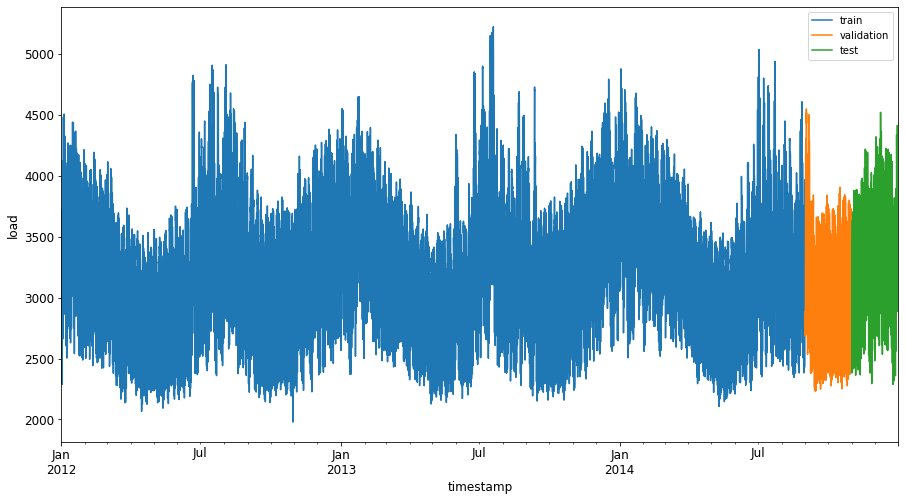

In [ ]:
#Hint: same as in the CNN

## Data preparation

For this example, we will set *T=6*. This means that the input for each sample is a vector of the prevous 6 hours of the energy load. The choice of *T=6* was arbitrary but should be selected through experimentation.

*HORIZON=1* specifies that we have a forecasting horizon of 1 (*t+1*)

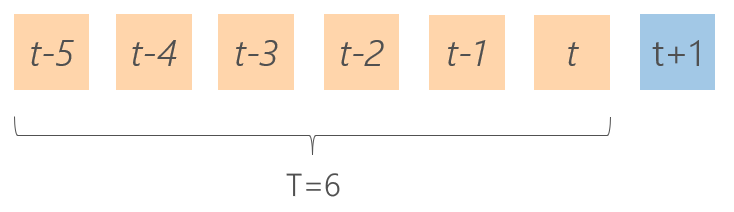

In [ ]:
T = 6
HORIZON = 1

Our data preparation for the training set will involve the following steps:

1. Filter the original dataset to include only that time period reserved for the training set
2. Scale the time series such that the values fall within the interval (0, 1)
3. Shift the values of the time series to create a Pandas dataframe containing all the data for a single training example
4. Discard any samples with missing values
5. Transform this Pandas dataframe into a numpy array of shape (samples, time steps, features) for input into Keras

#### Data preparation - training set

In [ ]:
# 1. Get the train data from the correct data range
train = #
# 2. Scale data to be in range (0, 1). 
#   This transformation should be calibrated on the training set only. 
#   This is to prevent information from the validation or test sets 
#   leaking into the training data.
scaler = #
train['load'] = #

# 3. Shift the dataframe to create the input samples.
train_shifted = train.copy()
train_shifted['y_t+1'] = #
# Do something here
# ...
#
y_col = 'y_t+1'
X_cols = #
train_shifted.columns = #

# 4.Discard any samples with missing values
train_shifted = #
train_shifted.head(5)

,load_original,y_t+1,load_t-5,load_t-4,load_t-3,load_t-2,load_t-1,load_t
2012-01-01 05:00:00,0.15,0.18,0.22,0.18,0.14,0.13,0.13,0.15
2012-01-01 06:00:00,0.18,0.23,0.18,0.14,0.13,0.13,0.15,0.18
2012-01-01 07:00:00,0.23,0.29,0.14,0.13,0.13,0.15,0.18,0.23
2012-01-01 08:00:00,0.29,0.35,0.13,0.13,0.15,0.18,0.23,0.29
2012-01-01 09:00:00,0.35,0.37,0.13,0.15,0.18,0.23,0.29,0.35


Now convert the target and input features into numpy arrays. X needs to be in the **shape (samples, time steps, features)**. Here we have 23370 samples, 6 time steps and 1 feature (load).

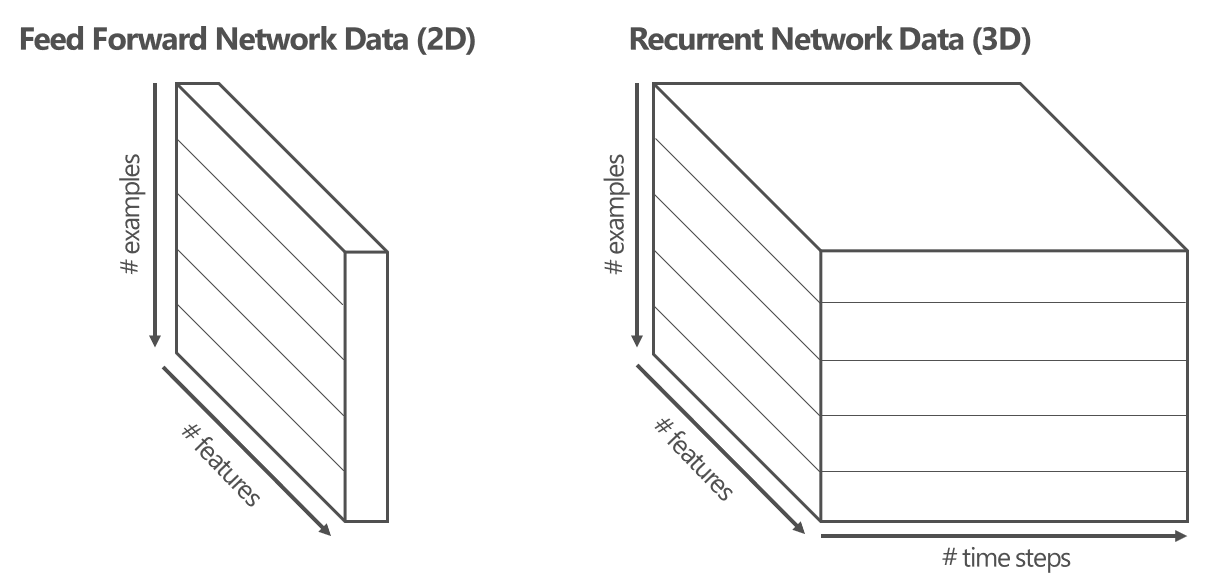

In [ ]:
# 5.Transform this Pandas dataframe into a numpy array
y_train = #
X_train = #

In [ ]:
# This is an important step to reshape the X into 3 dimension array
X_train = #

We now have a vector for target variable of shape:

In [ ]:
y_train.shape

(23370,)

The target varaible for the first 3 samples looks like:

In [ ]:
y_train[:3]

array([0.18, 0.23, 0.29])

The tensor for the input features now has the shape:

In [ ]:
X_train.shape

(23370, 6, 1)

And the first 3 samples looks like:

In [ ]:
X_train[:3]

array([[[0.22],
        [0.18],
        [0.14],
        [0.13],
        [0.13],
        [0.15]],

       [[0.18],
        [0.14],
        [0.13],
        [0.13],
        [0.15],
        [0.18]],

       [[0.14],
        [0.13],
        [0.13],
        [0.15],
        [0.18],
        [0.23]]])

We can sense check this against the first 3 records of the original dataframe:

In [ ]:
train_shifted.head(3)

,load_original,y_t+1,load_t-5,load_t-4,load_t-3,load_t-2,load_t-1,load_t
2012-01-01 05:00:00,0.15,0.18,0.22,0.18,0.14,0.13,0.13,0.15
2012-01-01 06:00:00,0.18,0.23,0.18,0.14,0.13,0.13,0.15,0.18
2012-01-01 07:00:00,0.23,0.29,0.14,0.13,0.13,0.15,0.18,0.23


#### Data preparation - validation set

Now we follow a similar process for the validation set. We keep *T* hours from the training set in order to construct initial features.

In [ ]:
# 1. Get the validation data from the correct data range
look_back_dt = #
valid = energy.copy()[#][['load']]

# 2. Scale the series using the transformer fitted on the training set:
valid['load'] = #

# 3. Shift the dataframe to create the input samples
valid_shifted = valid.copy()
valid_shifted['y+1'] = #
# Do something
# ...
#    

# 4.Discard any samples with missing values
valid_shifted = #
valid_shifted.head(3)

,load,y+1,load_t-5,load_t-4,load_t-3,load_t-2,load_t-1,load_t-0
2014-09-01 00:00:00,0.28,0.24,0.61,0.58,0.51,0.43,0.34,0.28
2014-09-01 01:00:00,0.24,0.22,0.58,0.51,0.43,0.34,0.28,0.24
2014-09-01 02:00:00,0.22,0.22,0.51,0.43,0.34,0.28,0.24,0.22


In [ ]:
# 5.Transform this Pandas dataframe into a numpy array
y_valid = #
X_valid = #
X_valid = # reshape it

Prepare validation inputs in the same way as the training set:

In [ ]:
y_valid.shape

(1463,)

In [ ]:
y_valid[:3]

array([0.24, 0.22, 0.22])

In [ ]:
X_valid.shape

(1463, 6, 1)

In [ ]:
X_valid[:3]

array([[[0.61],
        [0.58],
        [0.51],
        [0.43],
        [0.34],
        [0.28]],

       [[0.58],
        [0.51],
        [0.43],
        [0.34],
        [0.28],
        [0.24]],

       [[0.51],
        [0.43],
        [0.34],
        [0.28],
        [0.24],
        [0.22]]])

## Implement the RNN

We will implement a simple RNN forecasting model with the following structure:

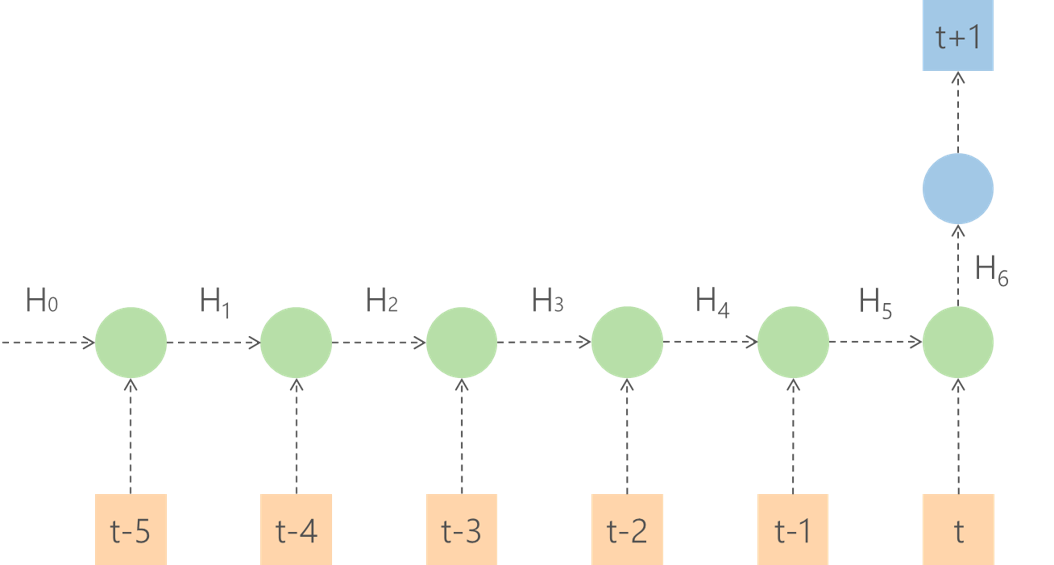

In [ ]:
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping

In [ ]:
LATENT_DIM = 5 # number of units in the RNN layer
BATCH_SIZE = 32 # number of samples per mini-batch
EPOCHS = 10 # maximum number of times the training algorithm will cycle through all samples

In [ ]:
model = #
model.add(#)
model.add(#)

Use mean squared error as the loss function. The Keras documentation recommends the optimizer RMSprop for RNNs.

In [ ]:
model.compile(optimizer='RMSprop', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 5)                 120       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


Specify the early stopping criteria. We **monitor** the validation loss (in this case the mean squared error) on the validation set after each training epoch. If the validation loss has not improved by **min_delta** after **patience** epochs, we stop the training.

In [ ]:
earlystop = #

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_valid, y_valid),
                    callbacks=[earlystop],
                    verbose=1)

Epoch 1/10
731/731 [==============================] - 3s 4ms/step - loss: 0.0102 - val_loss: 0.0018
Epoch 2/10
731/731 [==============================] - 3s 4ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/10
731/731 [==============================] - 3s 4ms/step - loss: 0.0011 - val_loss: 9.0709e-04
Epoch 4/10
731/731 [==============================] - 3s 4ms/step - loss: 8.8440e-04 - val_loss: 6.9875e-04
Epoch 5/10
731/731 [==============================] - 3s 4ms/step - loss: 7.4137e-04 - val_loss: 5.9305e-04
Epoch 6/10
731/731 [==============================] - 3s 4ms/step - loss: 6.5796e-04 - val_loss: 5.4010e-04
Epoch 7/10
731/731 [==============================] - 3s 4ms/step - loss: 6.1264e-04 - val_loss: 5.1318e-04
Epoch 8/10
731/731 [==============================] - 3s 4ms/step - loss: 5.8742e-04 - val_loss: 6.6987e-04
Epoch 9/10
731/731 [==============================] - 7s 9ms/step - loss: 5.8180e-04 - val_loss: 5.1554e-04
Epoch 10/10
731/731 [===========================

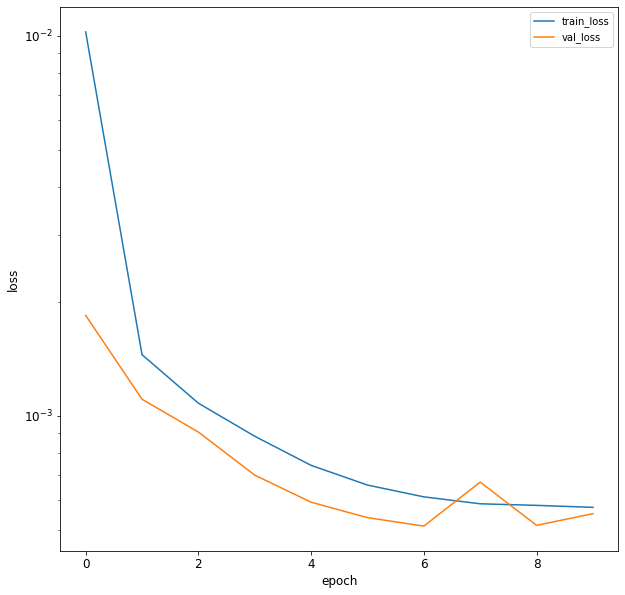

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

## Evaluate the model

Data preperation - test set

In [ ]:
# 1. Get the test data from the correct data range
look_back_dt = #
test = energy.copy()[#][['load']]

# 2. Scale the data
test['load'] = #

# 3. Shift the dataframe to create the input samples
test_shifted = test.copy()
test_shifted['y_t+1'] = #
# Do something
# ...
#

# 4.Discard any samples with missing values
test_shifted = #

# 5.Transform this Pandas dataframe into a numpy array
y_test = #
X_test = #
X_test = #


In [ ]:
y_test.shape

(1458,)

In [ ]:
X_test.shape

(1458, 6, 1)

Make predictions on test set

In [ ]:
predictions = # You should know now
predictions

array([[0.22],
       [0.3 ],
       [0.38],
       ...,
       [0.54],
       [0.47],
       [0.43]], dtype=float32)

Compare predictions to actual load

In [ ]:
eval_df = #
eval_df['timestamp'] = #
eval_df = #
eval_df['actual'] = #
eval_df[['prediction', 'actual']] = #
eval_df.head()

,timestamp,h,prediction,actual
0,2014-11-01 05:00:00,t+1,"2,689.51","2,714.00"
1,2014-11-01 06:00:00,t+1,"2,952.24","2,970.00"
2,2014-11-01 07:00:00,t+1,"3,217.45","3,189.00"
3,2014-11-01 08:00:00,t+1,"3,351.49","3,356.00"
4,2014-11-01 09:00:00,t+1,"3,477.34","3,436.00"


Compute the mean absolute percentage error over all predictions

In [ ]:
#

0.01637952038487378

Plot the predictions vs the actuals for the first week of the test set

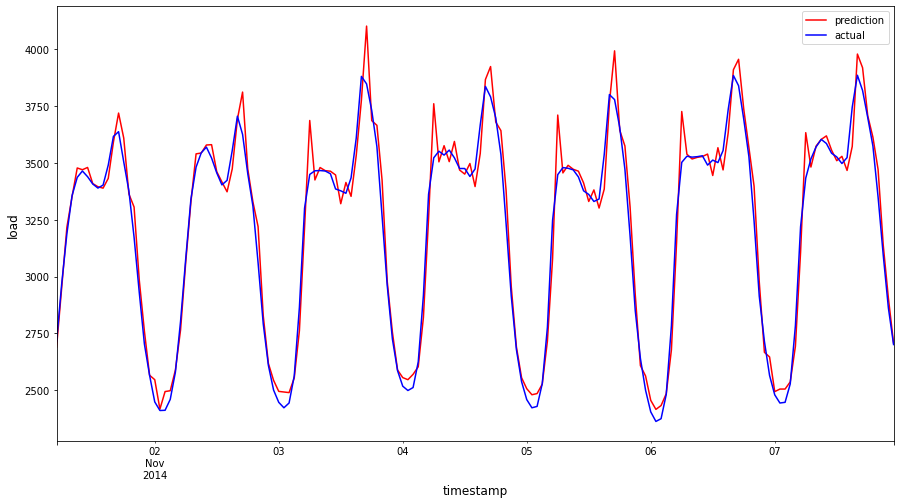

In [ ]:
###